In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
covid_data = pd.read_csv("time_series_covid_19_deaths.csv")
covid_data.set_index("Country/Region",inplace = True)
#Making a new dataframe with just the scandinavian countries
covid_data_scandinavia = covid_data.loc[["Norway","Sweden","Denmark","Finland"]]
#Selecting only the region that are parts of scandinavia proper, so no Greenland and Faroe islands
covid_data_scandinavia = covid_data_scandinavia[covid_data_scandinavia["Province/State"].isnull()]
#Transposing the dataframa, so the countries are the columns, and then removing unnecesary rows
covid_data_scandinavia.drop(["Province/State","Lat","Long"],inplace = True,axis = 1)
#Transform dates from columns to rows
covid_data_scandinavia = pd.melt(covid_data_scandinavia.reset_index(),
                                id_vars = ["Country/Region"],
                                var_name="Date", 
                                value_name="Total dead")


covid_data_scandinavia["Date"] = pd.to_datetime(covid_data_scandinavia["Date"]) # coverts to datetime format

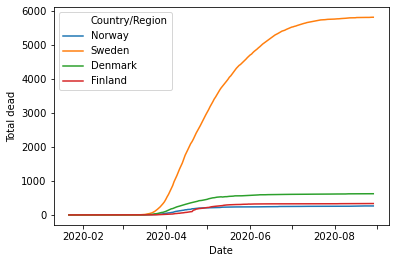

In [3]:
plot = sb.lineplot(x = "Date", y="Total dead", 
                   hue = "Country/Region",
                   data = covid_data_scandinavia.reset_index(),
                   estimator = None)
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 2 == 0:  # every 2th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
# Her kan vi se antall døde over tid blant de ulike skandinaviske landene
# Vi kan konkludere med at det definitivt har død flest i Sverige hittil.
#Det har død omtrent like mange blant de resterende skandinaviske landene

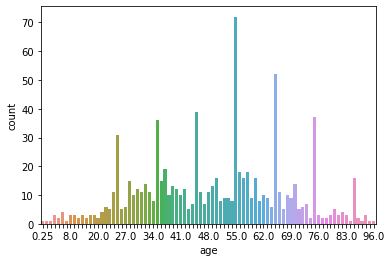

In [4]:
list_data = pd.read_csv("COVID19_line_list_data.csv")
age_plot = sb.countplot(x = "age",data = list_data)
for ind, label in enumerate(age_plot.get_xticklabels()):
    if ind % 7 == 0:  # every 2th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
#Vi kan se de aller fleste pasientene er eldre

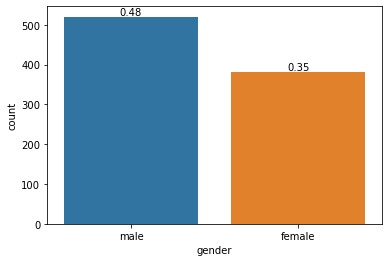

In [5]:
ax = sb.countplot(x="gender",data=list_data)
value_count = list_data['gender'].value_counts()
total = float(len(list_data["gender"])) #Number of patients
#Putting percentage on the top of both bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
    
#Vi kan se at det er flere menn enn kvinner som blir syke
#Summen av prosentene blir ikke hundre noe som vil si at jeg har gjort noe feil,
#eller at ikke alle pasientenes kjønn er identifisert i dataen